# Customer Service Requests Analysis

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [2]:
nyc311 = pd.read_csv("D:\\2. Learnings\\1. SimpliLearn\\3. Projects\\NYC 311\\311_Service_Requests_from_2010_to_Present.csv")

C:\Users\Abhilash\AppData\Local\Temp\ipykernel_17748\1767040683.py:1: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  nyc311 = pd.read_csv("D:\\2. Learnings\\1. SimpliLearn\\3. Projects\\NYC 311\\311_Service_Requests_from_2010_to_Present.csv")


In [3]:
nyc311.head(100)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,32309556,12/31/2015 10:32:15 PM,01-01-16 3:09,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11209.0,7202 COLONIAL ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634683,-74.032372,"(40.63468257788384, -74.03237225560268)"
96,32307877,12/31/2015 10:30:42 PM,01-01-16 7:39,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10308.0,4029 HYLAN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.541547,-74.146661,"(40.541547488661976, -74.14666129786113)"
97,32308469,12/31/2015 10:29:33 PM,12/31/2015 11:24:03 PM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11364.0,67-50 222 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.744260,-73.753328,"(40.74426042471261, -73.7533277011137)"
98,32305448,12/31/2015 10:28:13 PM,01-01-16 1:38,NYPD,New York City Police Department,Vending,In Prohibited Area,Store/Commercial,10011.0,76 11 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.745183,-74.008236,"(40.74518302244613, -74.00823550500606)"


In [4]:
nyc311.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"
300697,30281825,03/29/2015 12:33:01 AM,03/29/2015 04:41:50 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10036.0,251 WEST 48 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.760583,-73.985922,"(40.76058322950115, -73.98592204392392)"


In [5]:
nyc311.shape

(300698, 53)

In [6]:
nyc311.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [7]:
nyc311['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

In [9]:
nyc311['Descriptor'].unique()

array(['Loud Music/Party', 'No Access', 'Commercial Overnight Parking',
       'Blocked Sidewalk', 'Posted Parking Sign Violation',
       'Blocked Hydrant', 'With License Plate', 'Partial Access',
       'Unauthorized Bus Layover', 'Double Parked Blocking Vehicle',
       'Double Parked Blocking Traffic', 'Vehicle', 'Loud Talking',
       'Banging/Pounding', 'Car/Truck Music', 'Tortured',
       'In Prohibited Area', 'Congestion/Gridlock', 'Neglected',
       'Car/Truck Horn', 'In Public', 'Other (complaint details)', nan,
       'No Shelter', 'Truck Route Violation', 'Unlicensed',
       'Overnight Commercial Storage', 'Engine Idling',
       'After Hours - Licensed Est', 'Detached Trailer',
       'Underage - Licensed Est', 'Chronic Stoplight Violation',
       'Loud Television', 'Chained', 'Building', 'In Car',
       'Police Report Requested', 'Chronic Speeding',
       'Playing in Unsuitable Place', 'Drag Racing',
       'Police Report Not Requested', 'Nuisance/Truant', 'Homeless

In [10]:
complaintTypecity = pd.DataFrame({'count': nyc311.groupby(['Complaint Type','City']).size()}).reset_index()
complaintTypecity

,Complaint Type,City,count
0,Animal Abuse,ARVERNE,38
1,Animal Abuse,ASTORIA,125
2,Animal Abuse,BAYSIDE,37
3,Animal Abuse,BELLEROSE,7
4,Animal Abuse,BREEZY POINT,2
...,...,...,...
759,Vending,STATEN ISLAND,25
760,Vending,SUNNYSIDE,15
761,Vending,WHITESTONE,1
762,Vending,WOODHAVEN,6


In [11]:
nyc311.groupby(['Borough','Complaint Type','Descriptor']).size()

Borough      Complaint Type         Descriptor               
BRONX        Animal Abuse           Chained                      132
                                    In Car                        36
                                    Neglected                    673
                                    No Shelter                    71
                                    Other (complaint details)    311
                                                                ... 
Unspecified  Noise - Vehicle        Engine Idling                 11
             Posting Advertisement  Vehicle                        1
             Traffic                Truck Route Violation          1
             Vending                In Prohibited Area             2
                                    Unlicensed                     5
Length: 288, dtype: int64

--------------------------------------------------------------------------------------------------------

In [5]:
import datetime

In [6]:
df = pd.read_csv("D:\\2. Learnings\\1. SimpliLearn\\3. Projects\\NYC 311\\311_Service_Requests_from_2010_to_Present.csv", parse_dates=["Created Date", "Closed Date"])

C:\Users\Abhilash\AppData\Local\Temp\ipykernel_7940\1603520309.py:1: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:\\2. Learnings\\1. SimpliLearn\\3. Projects\\NYC 311\\311_Service_Requests_from_2010_to_Present.csv", parse_dates=["Created Date", "Closed Date"])


In [ ]:
df["Request_Closing_Time"] = df["Closed Date"] - df["Created Date"]

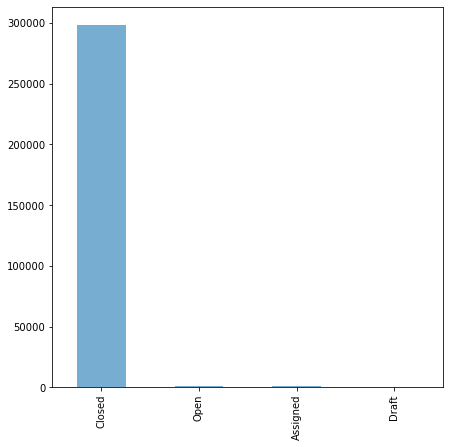

In [10]:
df['Status'].value_counts().plot(kind='bar',alpha=0.6,figsize=(7,7))
plt.show()

#Here is the status of the Tickets

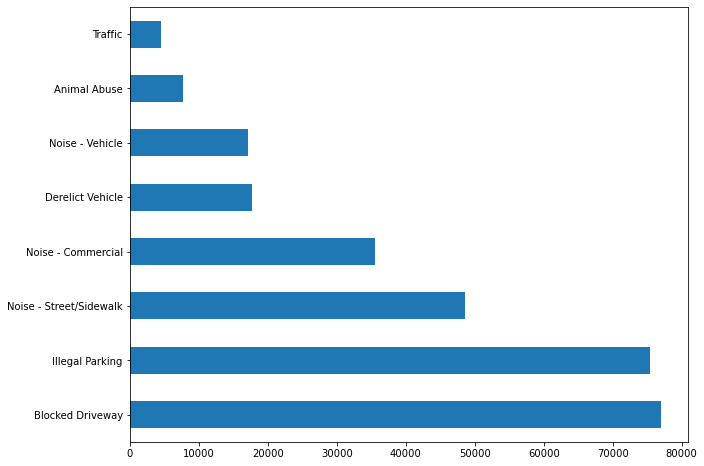

In [4]:
nyc311['Complaint Type'].value_counts().head(8).plot(kind='barh',figsize=(10,8));

#Here is the bar plot with respect to complaint type to figure majority of complaint type

In [17]:
nyc311.groupby(["Borough","Complaint Type","Descriptor"]).size()

Borough      Complaint Type         Descriptor               
BRONX        Animal Abuse           Chained                      132
                                    In Car                        36
                                    Neglected                    673
                                    No Shelter                    71
                                    Other (complaint details)    311
                                                                ... 
Unspecified  Noise - Vehicle        Engine Idling                 11
             Posting Advertisement  Vehicle                        1
             Traffic                Truck Route Violation          1
             Vending                In Prohibited Area             2
                                    Unlicensed                     5
Length: 288, dtype: int64

In [18]:
majorcomplints=nyc311.dropna(subset=["Complaint Type"])
majorcomplints=nyc311.groupby("Complaint Type")

sortedComplaintType = majorcomplints.size().sort_values(ascending = False)
sortedComplaintType = sortedComplaintType.to_frame('count').reset_index()

sortedComplaintType
sortedComplaintType.head(10)

#Top 10 complaint types in decending order

,Complaint Type,count
0,Blocked Driveway,77044
1,Illegal Parking,75361
2,Noise - Street/Sidewalk,48612
3,Noise - Commercial,35577
4,Derelict Vehicle,17718
5,Noise - Vehicle,17083
6,Animal Abuse,7778
7,Traffic,4498
8,Homeless Encampment,4416
9,Noise - Park,4042


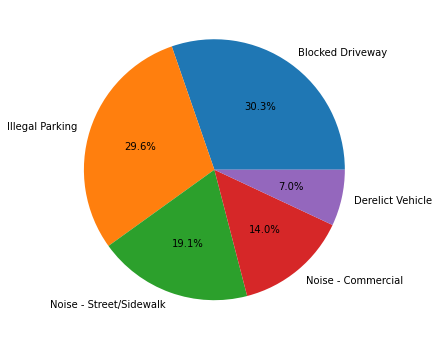

In [31]:
sortedComplaintType = sortedComplaintType.head()
plt.figure(figsize=(6,6))
plt.pie(sortedComplaintType['count'],labels=sortedComplaintType["Complaint Type"], autopct="%1.1f%%")
plt.show()

In [21]:
#Group dataset by complaint type to display plot against city
groupedby_complainttype = df.groupby('Complaint Type')

In [22]:
grp_data = groupedby_complainttype.get_group('Blocked Driveway')
grp_data.shape

(77044, 53)

In [23]:
df.isnull().sum()

#In order to fetch the null values entered in the database

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [24]:
#fix blank values in City column
df['City'].dropna(inplace=True)

In [25]:
#Shape after dropping null values
df['City'].shape

(300698,)

In [26]:
#count of null values in grouped city column data
grp_data['City'].isnull().sum()

283

In [27]:
#fix those NULL with "unknown city" value instead
grp_data['City'].fillna('Unknown City', inplace =True)

C:\Users\Abhilash\AppData\Local\Temp\ipykernel_7940\3111633021.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grp_data['City'].fillna('Unknown City', inplace =True)


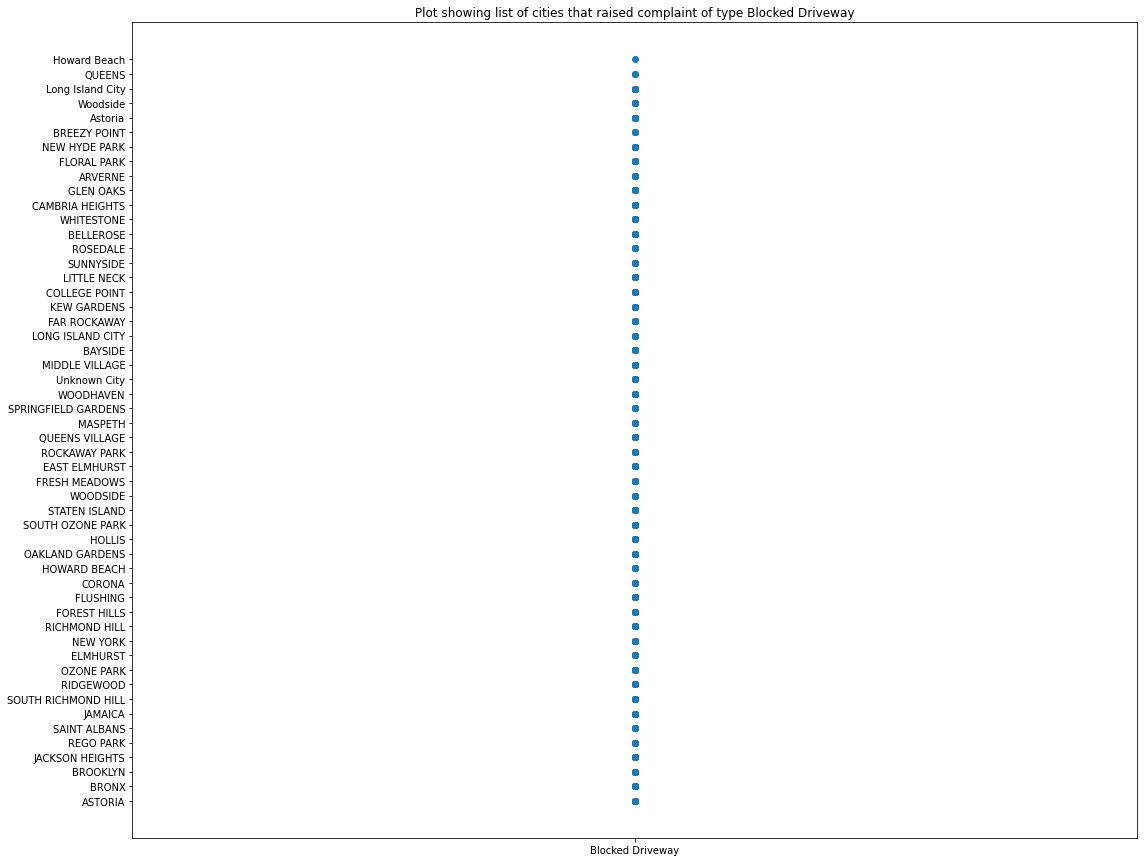

In [29]:
#Scatter plot displaying all the cities that raised complaint of type 'Blocked Driveway'
plt.figure(figsize=(18, 15))
plt.scatter(grp_data['Complaint Type'],grp_data['City'])
plt.title('Plot showing list of cities that raised complaint of type Blocked Driveway')
plt.show()